In [1]:
url='https://raw.githubusercontent.com/ramar92/NLP-Dataset/main/customer_reviews.csv'

In [2]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import requests

In [3]:
df = pd.read_csv(url)

In [4]:
df

,Review
0,I love this product! It's amazing and works pe...
1,This is the worst experience I've ever had.
2,"The product is okay, but I expected something ..."
3,Absolutely fantastic! Would buy again.
4,Not worth the price. Completely disappointed.
5,"Customer service was helpful, but the product ..."
6,Delivery was super fast and the packaging was ...
7,"Terrible quality, broke within a week."
8,"Decent, but I wouldn't recommend it for the pr..."
9,Super happy with my purchase. Best decision ever!


In [5]:
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\s_nas\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [32]:
def get_sentiment(score):
    if score >= 0.50:
        return "Positive"
    elif score <= -0.50:
        return "Negative"
    else:
        return "Neutral"


In [33]:
df['compound'] = df['Review'].apply(lambda x: sia.polarity_scores(str(x))['compound'])

In [34]:
df

,Review,compound,sentiment,Sentiment
0,I love this product! It's amazing and works pe...,0.9259,Positive,Positive
1,This is the worst experience I've ever had.,-0.6249,Negative,Negative
2,"The product is okay, but I expected something ...",0.6486,Positive,Positive
3,Absolutely fantastic! Would buy again.,0.6352,Positive,Positive
4,Not worth the price. Completely disappointed.,-0.6198,Negative,Negative
5,"Customer service was helpful, but the product ...",-0.5486,Negative,Negative
6,Delivery was super fast and the packaging was ...,0.8356,Positive,Positive
7,"Terrible quality, broke within a week.",-0.7096,Negative,Negative
8,"Decent, but I wouldn't recommend it for the pr...",-0.3950,Negative,Negative
9,Super happy with my purchase. Best decision ever!,0.9200,Positive,Positive


In [35]:
sia.polarity_scores('Wonderful product')

{'neg': 0.0, 'neu': 0.213, 'pos': 0.787, 'compound': 0.5719}

In [40]:
sia.polarity_scores('Terrible product')['compound']

-0.4767

In [37]:
df['Sentiment'] = df['compound'].apply(get_sentiment)

In [38]:
df

,Review,compound,sentiment,Sentiment
0,I love this product! It's amazing and works pe...,0.9259,Positive,Positive
1,This is the worst experience I've ever had.,-0.6249,Negative,Negative
2,"The product is okay, but I expected something ...",0.6486,Positive,Positive
3,Absolutely fantastic! Would buy again.,0.6352,Positive,Positive
4,Not worth the price. Completely disappointed.,-0.6198,Negative,Negative
5,"Customer service was helpful, but the product ...",-0.5486,Negative,Negative
6,Delivery was super fast and the packaging was ...,0.8356,Positive,Positive
7,"Terrible quality, broke within a week.",-0.7096,Negative,Negative
8,"Decent, but I wouldn't recommend it for the pr...",-0.3950,Negative,Neutral
9,Super happy with my purchase. Best decision ever!,0.9200,Positive,Positive


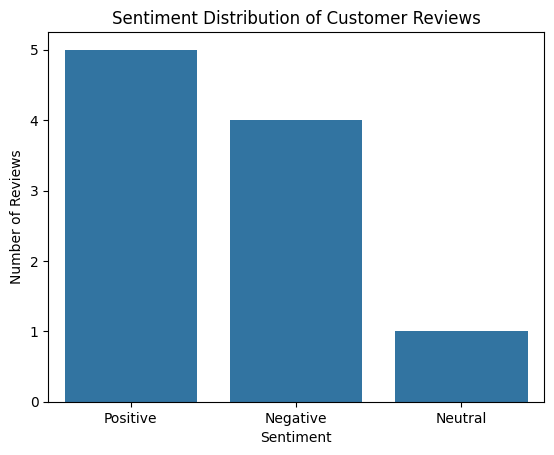

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Sentiment', data=df)
plt.title("Sentiment Distribution of Customer Reviews")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()
